# Introducción al Forecasting de Series de Tiempo con Python

In [ ]:
import IPython.core.display
import matplotlib

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

## Parte 1. Visualización de data

******

### Visitantes foráneos a UK 

#### Source: [Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/leisureandtourism/timeseries/gmaa/ott)

In [ ]:
# help(sns.set)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Cargar la data con Pandas DataFrame

In [ ]:
import pandas as pd
import numpy as np
# Cambiar la ruta en función a la ruta de su computadora
main = "F:/LAMBDA/Software Python/Data/"
# main = "F:/LAMBDA/Software Python/Data/"
df = pd.read_csv(main+"GMAA-040218.csv", header=None, skiprows=6, parse_dates=[0], names=['period', 'value'])
df.value.astype(int, copy=False);

In [ ]:
df.head(5)

,period,value
0,1980-01-01,739
1,1980-02-01,602
2,1980-03-01,740
3,1980-04-01,1028
4,1980-05-01,1088


In [ ]:
df.period
# Objeto.atributo
df.__class__

pandas.core.frame.DataFrame

In [ ]:

# df.index.shape[0]
# Objeto.atributo (particulares a cada objeto)
# df.shape[0]
#min_date.__class__

In [ ]:
max_date = df.period.max()
min_date = df.period.min()

num_of_actual_points = df.index.shape[0]
num_of_expected_points = (max_date.year - min_date.year) * 12 + max_date.month - min_date.month + 1

print("Rango de las Fechas: {} - {}".format(min_date.strftime("%d.%m.%Y"), max_date.strftime("%d.%m.%Y")))
print("Número de puntos de datos: {} de los esperados {}".format(num_of_actual_points, num_of_expected_points))


Rango de las Fechas: 01.01.1980 - 01.10.2017
Número de puntos de datos: 454 de los esperados 454


### Visualizar la data

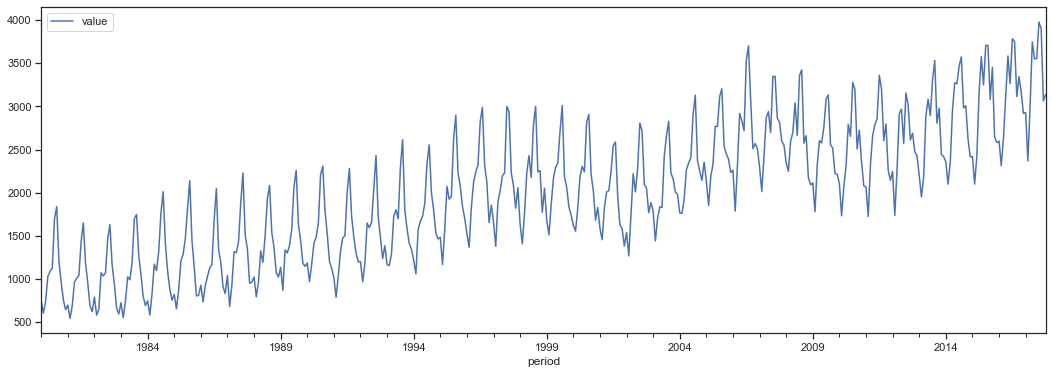

In [ ]:
# Para visualizar toda la base de datos
# fig: entorno del gráfico
# ax: definir los ejes
fig, ax = plt.subplots(figsize=(18,6))

# dataframe.plot()
df.plot(x="period", y="value", ax=ax)
plt.legend(loc='upper left')

plt.savefig(main+'intro-visualization.png');

In [ ]:
objeto1 = df[(df.period >= '2010-01-01') & (df.period < '2012-01-01')]

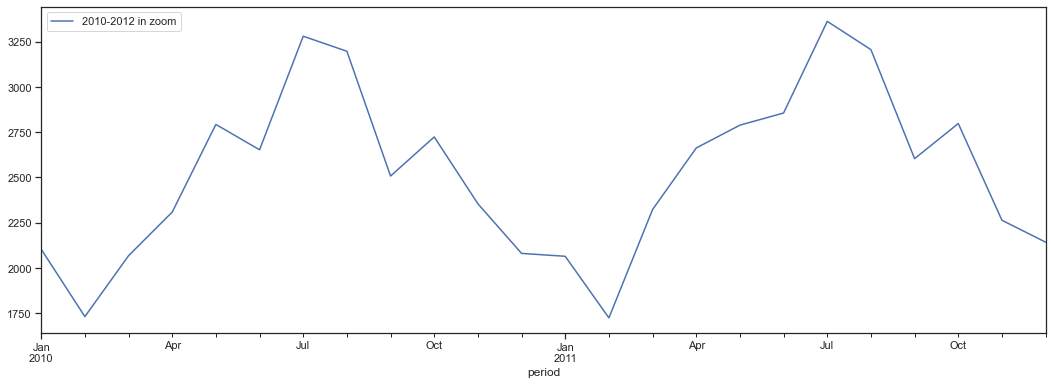

In [ ]:
# Un zoom de la base de datos (2010 hasta 2012)

zoom_range = objeto1.index

fig, ax = plt.subplots(figsize=(18,6))
# dataframe.loc[].plot()
df.loc[zoom_range].plot(x="period", y="value", ax=ax, label="2010-2012 in zoom")
# la ubicación de la legenda
plt.legend(loc='upper left')
# guardar el gráfico
plt.savefig(main+'intro-zoom.png');

## Tendencias y estacionalidad

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompfreq = 12  # estacionalidad cada 12 meses
model = 'additive'

decomposition = seasonal_decompose(df.set_index("period").value.interpolate("linear"),
                                   freq=decompfreq,
                                   model=model)

In [ ]:
import statsmodels.tsa.seasonal as tsas

decompfreq = 12  # estacionalidad cada 12 meses
model = 'additive'

decomposition = tsas.seasonal_decompose(df.set_index("period").value.interpolate("linear"),
                                   freq=decompfreq,
                                   model=model)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose as primera_des

decompfreq = 12  # estacionalidad cada 12 meses
model = 'additive'

decomposition = primera_des(df.set_index("period").value.interpolate("linear"),
                                   freq=decompfreq,
                                   model=model)

In [ ]:
decompfreq = 12  # estacionalidad cada 12 meses
model = 'additive'

decomposition = seasonal_decompose(df.set_index("period").value.interpolate("linear"),
                                   period=decompfreq,
                                   model=model)

In [ ]:
nobservaciones = decomposition.nobs
nobservaciones

(454,)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

# trend.__class__

### Tendencia

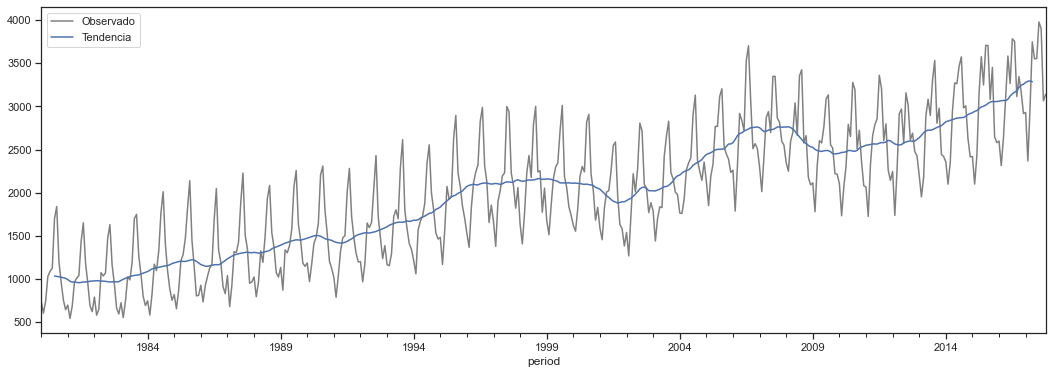

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
# dataframe
df.plot(x="period", y="value", ax=ax, label="Observado", c='grey')
# trend=dataframe
trend.plot(ax=ax, label="Tendencia")
plt.legend(loc='upper left')

plt.savefig(main+'intro-trend.png');

### La estacionalidad

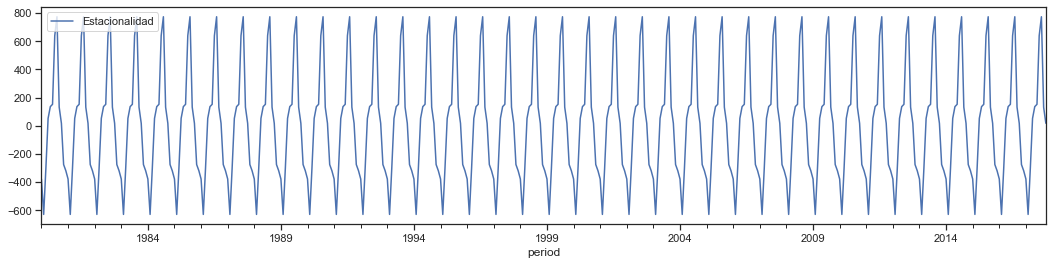

In [ ]:
fig, ax = plt.subplots(figsize=(18,4))
seasonal.plot(ax=ax, label="Estacionalidad")
plt.legend(loc='upper left')

plt.savefig(main+'intro-seasonality.png');

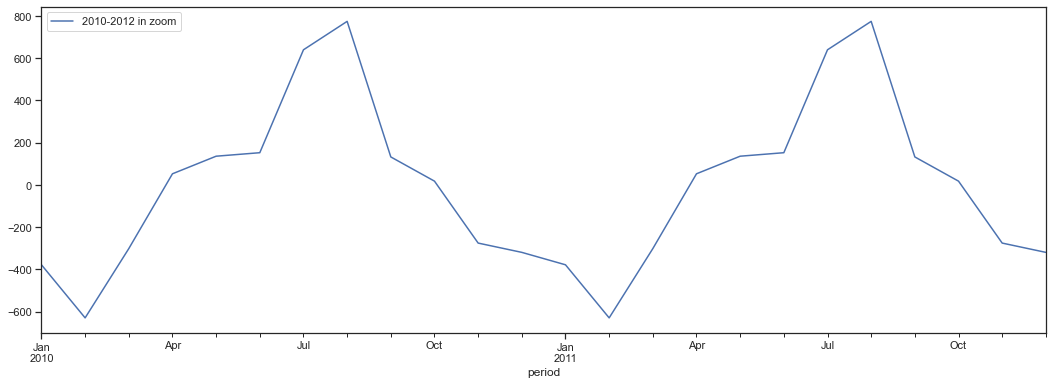

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
seasonal[zoom_range].plot(x="period", y="value", ax=ax, label="2010-2012 in zoom")
plt.legend(loc='upper left')

### Aleatorio

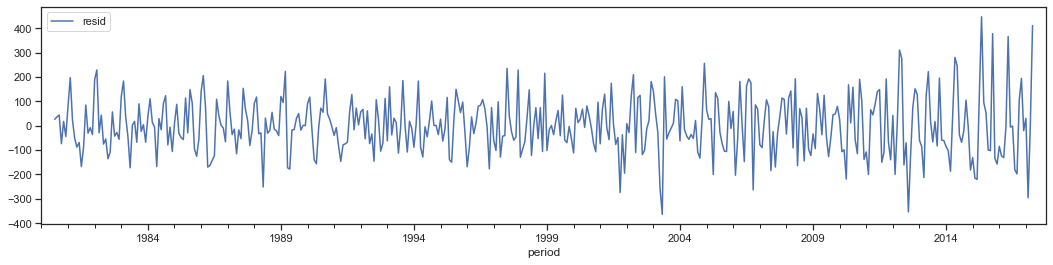

In [ ]:
fig, ax = plt.subplots(figsize=(18,4))
residual.plot(ax=ax, legend="Aleatorio")
plt.legend(loc='upper left')

In [ ]:
decomposition.__class__

statsmodels.tsa.seasonal.DecomposeResult

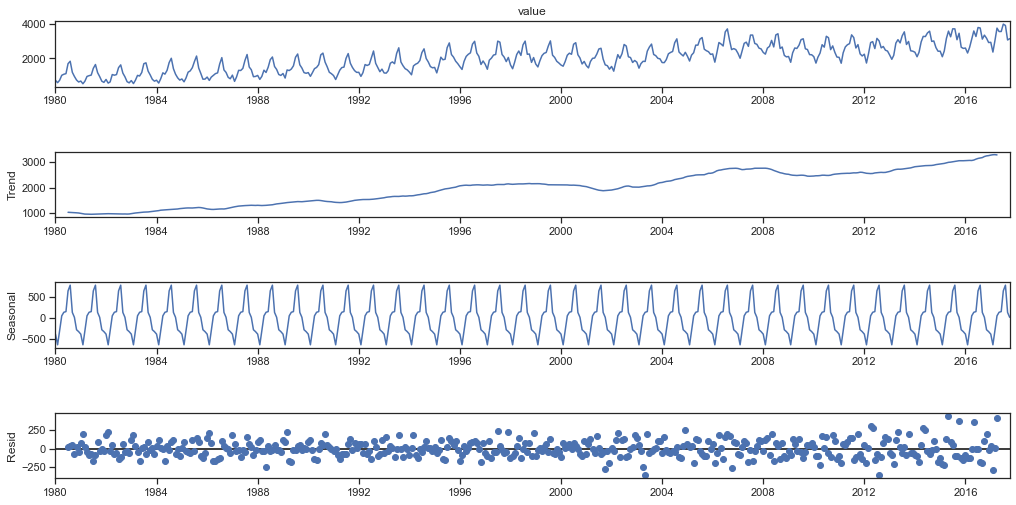

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasons = 12
decompfreq = seasons
model = 'additive'

decomposition = seasonal_decompose(
    df.set_index("period").value.interpolate("linear"),
    freq=decompfreq,
    model=model)

# Para hacer el gráfico combinado de todas los componentes de la serie de tiempo
#fig= objeto
# decomposition=DecomposeResult.plot()
fig = decomposition.plot()
fig.set_size_inches(16, 8)

plt.savefig(main+'descomposicion.png');

## Parte 2. Modelo Estocástico
******

## Modelo SARIMA

In [ ]:
train_range = df[df.period < '2014-01-01'].index
test_range = df[(df.period >= '2014-01-01')].index

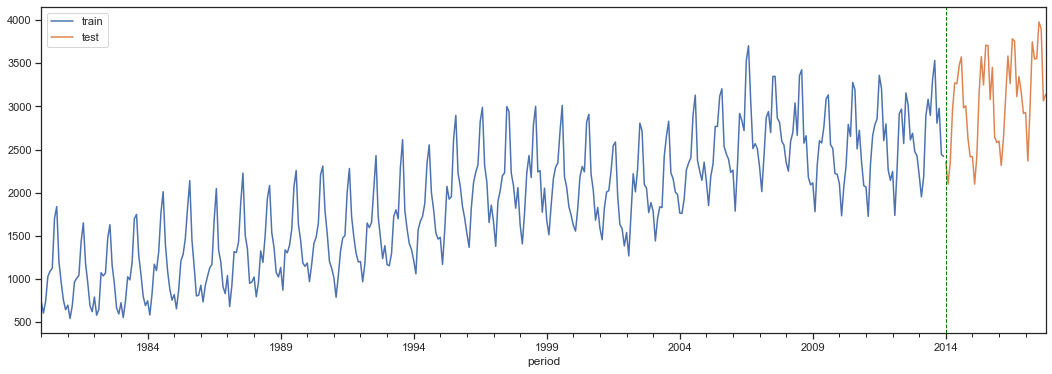

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
# dataframe.plot(argumentos)
df.loc[train_range].plot(x="period", y="value", ax=ax, label="train")
df.loc[test_range].plot(x="period", y="value", ax=ax, label="test")

# paquete.modulo.método()
# matplotlib.pyplot.axvline: genera un línea vertical
# pandas.to_datetime()
plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='green', ls='--', lw=1)
plt.legend(loc='upper left')

### 1. ¿Es estacionaria?

### Test de raíz unitaria de Dickey-Fuller aumentado ([ADF](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test))

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Definición de una función: def
def is_stationary_with_adf(data, significance_level=0.01):
    test = adfuller(data, regression='c', autolag='BIC')
    p_value = test[1]
    print("ADF p-value: {:0.5f}".format(p_value))
    return p_value < significance_level

### Test de estacionariedad de Kwiatkowski-Phillips-Schmidt-Shin ([KPSS](http://www.statisticshowto.com/kpss-test/))

In [ ]:
from statsmodels.tsa.stattools import kpss

def is_stationary_with_kpss(data, significance_level=0.05):
    test = kpss(data, regression='c')
    p_value = test[1]
    print("KPSS p-value: {:0.5f}".format(p_value))
    return p_value > significance_level

In [ ]:
significance_level = 0.05
print("Nivel de Significancia: {}%".format(100 * significance_level), '\n')

print("Estacionariedad por ADF: {}".format(
    "si" if is_stationary_with_adf(df.value.values, significance_level) else "no"), '\n')

print("Estacionariedad por KPSS: {}".format(
    "si" if is_stationary_with_kpss(df.value.values, significance_level) else "no"))

Nivel de Significancia: 5.0% 

ADF p-value: 0.95519
Estacionariedad por ADF: no 

KPSS p-value: 0.01000
Estacionariedad por KPSS: no


C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Estadísticos de Estacionalidad

In [ ]:
from scipy import stats
df['boxcox'], lmbda = stats.boxcox(df.value)

print("Estacionaria por ADF: {}".format(
    "si" if is_stationary_with_adf(df.boxcox.dropna().values, significance_level) else "no"), '\n')

print("Estacionaria por KPSS: {}".format(
    "si" if is_stationary_with_kpss(df.boxcox.dropna().values, significance_level) else "no"))

ADF p-value: 0.91430
Estacionaria por ADF: no 

KPSS p-value: 0.01000
Estacionaria por KPSS: no


C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
df["fd"] = df.boxcox - df.boxcox.shift(1)

In [ ]:
df["stationary"] = df.fd - df.fd.shift(seasons)

In [ ]:
print("Estacionaria por ADF: {}".format(
    "si" if is_stationary_with_adf(df.stationary.dropna().values, significance_level) else "no"), '\n')

print("Estacionaria por KPSS: {}".format(
    "si" if is_stationary_with_kpss(df.stationary.dropna().values, significance_level) else "no"))

ADF p-value: 0.00000
Estacionaria por ADF: si 

KPSS p-value: 0.10000
Estacionaria por KPSS: si


C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## 2) Modelo AutoRegressive Integrated Moving Average (ARIMA)

In [ ]:
import statsmodels

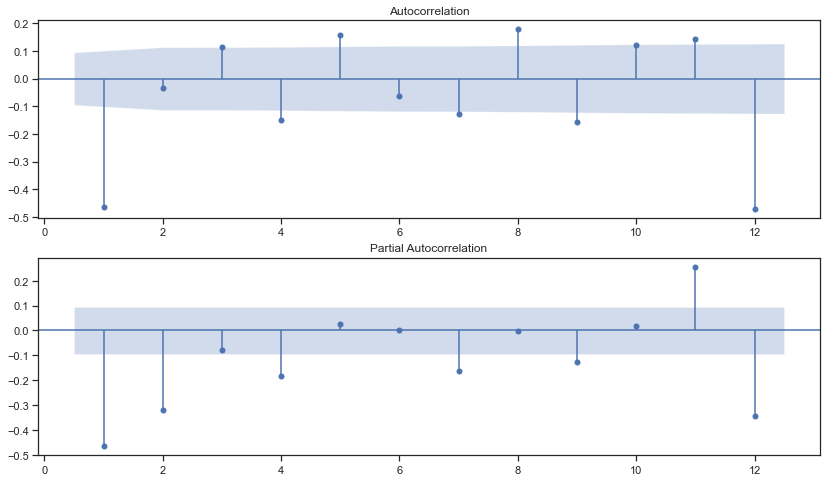

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(14,8))

# ax=eje = figura.add_subplot(filas|columnas|ubicación)
ax = fig.add_subplot(211)
fig = plot_acf(df.stationary.dropna(inplace=False).iloc[seasons + 1:], lags=12, ax=ax, zero=False)

ax = fig.add_subplot(212)
fig = plot_pacf(df.stationary.dropna(inplace=False).iloc[seasons + 1:], lags=12, ax=ax, zero=False)

### Modelo Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors  (SARIMAX)

In [ ]:
import statsmodels.tsa

In [ ]:
# Activar la paquetería que vamos a utilizar para estimación
from statsmodels.tsa.statespace import sarimax

In [ ]:
help(statsmodels.tsa.statespace.sarimax)

Help on module statsmodels.tsa.statespace.sarimax in statsmodels.tsa.statespace:

NAME
    statsmodels.tsa.statespace.sarimax - SARIMAX Model

DESCRIPTION
    Author: Chad Fulton
    License: Simplified-BSD

CLASSES
    statsmodels.tsa.statespace.mlemodel.MLEModel(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
        SARIMAX
    statsmodels.tsa.statespace.mlemodel.MLEResults(statsmodels.tsa.base.tsa_model.TimeSeriesModelResults)
        SARIMAXResults
    statsmodels.tsa.statespace.mlemodel.MLEResultsWrapper(statsmodels.base.wrapper.ResultsWrapper)
        SARIMAXResultsWrapper
    
    class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
     |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=Fal

In [ ]:
# Especificación del modelo (p,d,q, P,D,Q,s)
model = sarimax.SARIMAX(np.log(df.loc[train_range].set_index("period").value),
                        trend='n', 
                        order=(1,1,1), 
                        seasonal_order=(1,1,0,12),
                        enforce_stationarity=True,
                        enforce_invertibility=True)

C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HBP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
model.__class__

statsmodels.tsa.statespace.sarimax.SARIMAX

In [ ]:
# Proceso de estimación (fit)
results = model.fit()
results.__class__

statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper

In [ ]:
# Mostrar el resultado
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                 477.947
Date:                             Wed, 08 Sep 2021   AIC                           -947.894
Time:                                     22:00:17   BIC                           -931.978
Sample:                                 01-01-1980   HQIC                          -941.588
                                      - 12-01-2013                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0508      0.075      0.681      0.496      -0.096       0.197
ma.L1         -0.6820      

In [ ]:
# Tab
results.pvalues

ar.L1       4.961641e-01
ma.L1       4.132770e-40
ar.S.L12    3.199750e-24
sigma2      3.487676e-56
dtype: float64

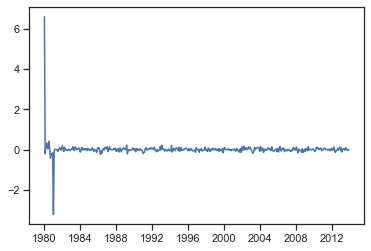

In [ ]:
# results.resid (objeto.atributo)
plt.plot(results.resid)

## Proyecciones

In [ ]:
test_range.shape

(46,)

In [ ]:
results.__class__

statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper

In [ ]:
steps = test_range.shape[0]

# Objeto SARIMAX aplicando función get_forecast()
forecast = results.get_forecast(steps=steps)
forecast_ci = forecast.conf_int()
forecast_ci_10 = forecast.conf_int(alpha=0.1)
forecast_ci_25 = forecast.conf_int(alpha=0.25)
forecast_ci_75 = forecast.conf_int(alpha=0.75)

In [ ]:
forecast.__class__

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [ ]:
# Objeto Prediction. atributo
forecast.predicted_mean

2014-01-01    7.762689
2014-02-01    7.581113
2014-03-01    7.762310
2014-04-01    8.030221
2014-05-01    8.074500
2014-06-01    7.975107
2014-07-01    8.140028
2014-08-01    8.156639
2014-09-01    7.964786
2014-10-01    8.011157
2014-11-01    7.864421
2014-12-01    7.850237
2015-01-01    7.790279
2015-02-01    7.636281
2015-03-01    7.786177
2015-04-01    8.059863
2015-05-01    8.113738
2015-06-01    8.030876
2015-07-01    8.180781
2015-08-01    8.220263
2015-09-01    8.010865
2015-10-01    8.063424
2015-11-01    7.893373
2015-12-01    7.881309
2016-01-01    7.835317
2016-02-01    7.668944
2016-03-01    7.832886
2016-04-01    8.103981
2016-05-01    8.153549
2016-06-01    8.063270
2016-07-01    8.219913
2016-08-01    8.249132
2016-09-01    8.047607
2016-10-01    8.097389
2016-11-01    7.937800
2016-12-01    7.924785
2017-01-01    7.872526
2017-02-01    7.711706
2017-03-01    7.869345
2017-04-01    8.141603
2017-05-01    8.193103
2017-06-01    8.106152
2017-07-01    8.259772
2017-08-01 

In [ ]:
# Clase Prediction.
yhat_test = np.exp(forecast.predicted_mean).values
# nueva_objeto = dataframe.localización[].nombre_variable.valores de esa variable
y_test = df.loc[test_range].value.values
y_test

array([2359, 2099, 2352, 2952, 3274, 3264, 3470, 3576, 2984, 3008, 2625,
       2417, 2419, 2099, 2431, 3155, 3578, 3250, 3710, 3708, 3081, 3454,
       2648, 2581, 2599, 2314, 2638, 3115, 3586, 3267, 3786, 3757, 3116,
       3346, 3167, 2919, 2931, 2368, 2999, 3750, 3553, 3556, 3981, 3902,
       3066, 3140], dtype=int64)

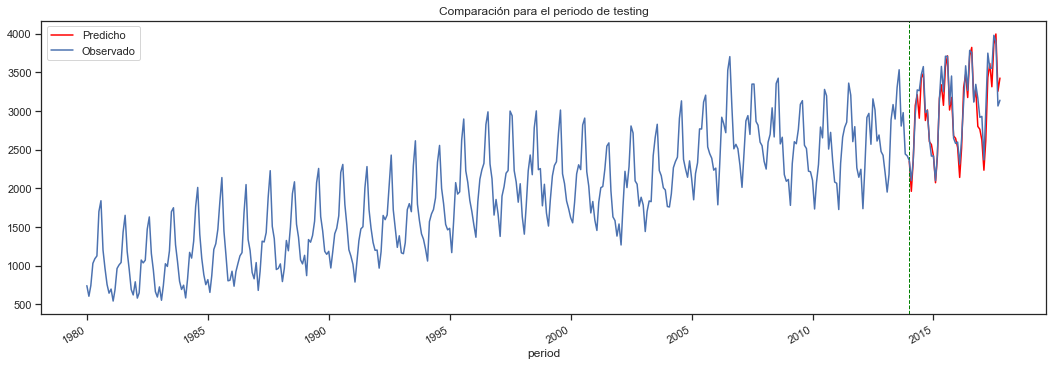

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))

# eje1.plot(x,y,color,label)
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="red", label="Predicho")

# Línea vertical
plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='green', ls='--', lw=1)
df.plot(x="period", y="value", ax=ax, label="Observado")

plt.legend(loc='best')
plt.title('Comparación para el periodo de testing')
plt.show();

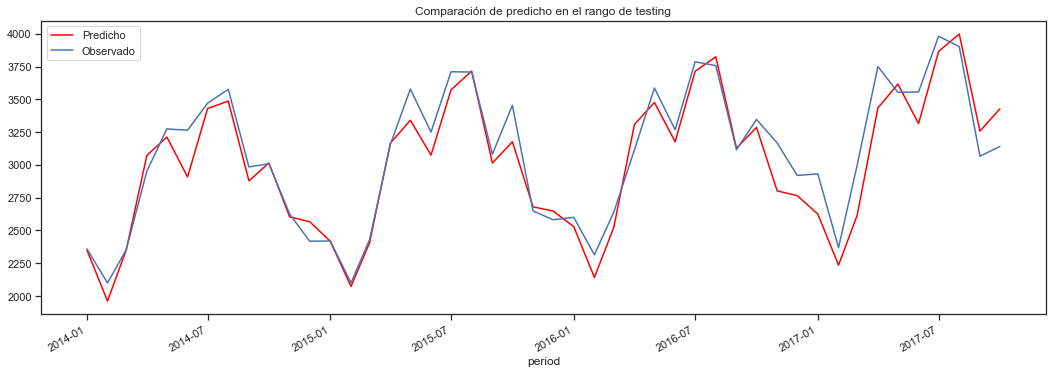

In [ ]:
# Zoom de la zona de testeo

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="red", label="Predicho")

df.loc[test_range].plot(x="period", y="value", ax=ax, label="Observado")
plt.legend(loc='best')
plt.title('Comparación de predicho en el rango de testing')
plt.show();

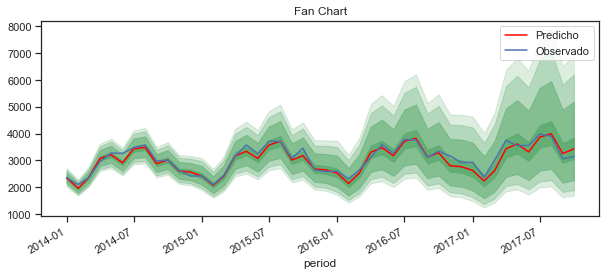

In [ ]:
# Gráfico con las bandas de confianza
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="red", label="Predicho")

# Área entre las bandas de confianza, lo relleno de un color
ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    np.exp(forecast_ci['lower value']),
    np.exp(forecast_ci['upper value']),
    color='g',
    alpha=0.2) # Grado de transparencia

# Área entre las bandas de confianza, lo relleno de un color
ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    np.exp(forecast_ci_10['lower value']),
    np.exp(forecast_ci_10['upper value']),
    color='g',
    alpha=0.3) # Grado de transparencia

# Área entre las bandas de confianza, lo relleno de un color
ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    np.exp(forecast_ci_25['lower value']),
    np.exp(forecast_ci_25['upper value']),
    color='g',
    alpha=0.5) # Grado de transparencia

# Área entre las bandas de confianza, lo relleno de un color
ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    np.exp(forecast_ci_75['lower value']),
    np.exp(forecast_ci_75['upper value']),
    color='g',
    alpha=0.7) # Grado de transparencia

df.loc[test_range].plot(x="period", y="value", ax=ax, label="Observado")

plt.legend(loc='best')
plt.title('Fan Chart')
plt.show();

### Evaluando el forecast

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# def : Crear una nueva función (argumento1, argumento2)
def theils_u_metric(y_true, y_pred):
    SS_res =  np.mean(np.square(y_true - y_pred))
    SS_true = np.mean(np.square(y_true))
    SS_pred = np.mean(np.square(y_pred))
    
    return np.sqrt(SS_res / (SS_true * SS_pred))

In [ ]:
mae = mean_absolute_error(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)
u = theils_u_metric(y_test, yhat_test)

print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2))
print("U   (test): {:0.6f}".format(u))

MAE (test): 126
MSE (test): 27016
R2  (test): 0.896
U   (test): 0.000017
